<a href="https://colab.research.google.com/github/Nov05/yelp-dataset-challenge/blob/master/2019_12_05_exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# created by nov05 on 2019-12-06
'''
# 【Exploratory Data Analysis Summary】

# there are 192,609 businesses in total

# there are 200,000 photos
# half of the photos have a caption
# there are 114,874 photos of food
# 57,151 photos about food have a caption.
# would need to do some basic NLP to convert captions to labels.
# there are 192,609 businesses in total
# only 30,488 businesses (15%) have photos
# whether having photos could a feature
# or we could compare businesses with photos with those without 
# any to see whether having photos would make difference

# tip text could make use of NLP
# e.g. "Great for watching games, ufc, and whatever el..."
# there are 192,609 businesses in total
# there are 123,997 tips, covered 64% businesses

# for user.csv, the 'friends' column has interesting information
# compliment sentiment columns could be very useful

# the size of review.csv is about 4.39 GB
# it is the largest among the text datasets
# there are 6,685,900 reviews
# there are 1,637,138 users who have left reviews
# there are 1,637,138 users in total in user.csv
# Google says "142 million unique visitors per month" for Yelp
# less, maybe far less, than 1% users would leave a review

# user.csv data actually comes from review.csv data
# review text will be the focus of NLP
'''

# imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dataset Documentation   
https://www.yelp.com/dataset/documentation/main   

# checkin.csv

In [0]:
# can't read large files via shareable links
# have to read from mounted google drive
url = "https://drive.google.com/open?id=1-0B2vGj7S9lF8s42jzj1mD0V0xLtp6U2" 
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/checkin.csv"
df_checkin = pd.read_csv(path)
print(df_checkin.shape)
df_checkin.head()
# there are 192,609 businesses in total

(161950, 2)


,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


# business.csv

In [0]:
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/business.csv"
df_business = pd.read_csv(path)
print(df_business.shape)
df_business.head()
# there are 192,609 businesses in total

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56,58,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(192609, 60)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.GoodForMeal,attributes.BusinessParking,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.Ambience,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,attributes.BusinessAcceptsCreditCards,attributes,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.Music,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.BestNights,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.HairSpecializesIn,attributes.Corkage,attributes.BYOB,attributes.DietaryRestrictions,attributes.Open24Hours,attributes.RestaurantsCounterService
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,"Golf, Active Life",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",True,u'loud',True,True,2,False,False,"{'romantic': False, 'intimate': False, 'classy...",False,u'no',u'full_bar',u'casual',True,False,9:0-0:0,9:0-0:0,9:0-0:0,9:0-0:0,9:0-1:0,9:0-1:0,9:0-0:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"Sushi Bars, Restaurants, Japanese",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",False,u'average',True,True,2,False,True,"{'romantic': False, 'intimate': False, 'touris...",True,u'no',u'beer_and_wine','casual',True,False,17:30-21:30,NaN,17:30-21:30,17:30-21:30,17:30-22:0,17:30-22:0,17:30-21:0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,"Insurance, Financial Services",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"Plumbing, Shopping, Local Services, Home Servi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# DtypeWarning: Columns (56,58,59) have mixed types. 
# Specify dtype option on import or set low_memory=False.
df_business.iloc[:,59].value_counts()

True     8
False    3
Name: attributes.RestaurantsCounterService, dtype: int64

# photo.csv

In [0]:
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/photo.csv"
df_photo = pd.read_csv(path, lineterminator='\n')
print(df_photo.shape)
df_photo.head()

(200000, 4)


,caption,photo_id,business_id,label
0,NaN,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,NaN,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside
2,NaN,1f7izSjM0WjkDRIVbPy1yw,ZkGDCVKSdf8m76cnnalL-A,food
3,NaN,NcSlcDTEEeOaixotOPk-rA,bF8gv7k_rwZtiDLP2ZB04w,inside
4,NaN,5IiIo5UKEW0lWqZ6sWrY_A,50Anorn0DJXFhBr9a9_gHQ,inside


In [0]:
# half of the photos have a caption
df_photo['caption'].value_counts(dropna=False)

NaN                                                                    107850
Interior                                                                  458
Inside                                                                    388
Menu                                                                      321
McDonald's All Day Breakfast Sandwiches                                   298
                                                                        ...  
Shinya Way to Heaven Ramen                                                  1
A Forest Hill tradition for more than 52 years...and still going...         1
Miss Korea Dishes                                                           1
All our free drinks thanks to our host!                                     1
Famous Baked Wings                                                          1
Name: caption, Length: 71513, dtype: int64

In [0]:
# there are 200,000 photos in total,
# and about half of them have a caption.
df_photo['label'].value_counts(dropna=False)

food       114874
inside      52448
drink       18121
outside     11534
menu         3023
Name: label, dtype: int64

In [0]:
# there are 114,874 photos of food
# 57,151 photos about food have a caption.
# would need to do some basic NLP to convert captions to labels.
df_photo[df_photo['caption'].notnull()]['label'].value_counts()

food       57151
inside     20790
drink       8382
outside     4485
menu        1342
Name: label, dtype: int64

In [0]:
print(30488/192609)
df_photo['business_id'].value_counts()
# there are 192,609 businesses in total
# only 30,488 businesses (15%) have photos
# whether having photos could a feature
# or we could compare businesses with photos with those without 
# any to see whether having photos would make difference

0.15828959186746205


RESDUcs7fIiihp38-d6_6g    823
K7lWdNUhCbcnEvI0NhGewg    642
vHz2RLtfUMVRPFmd7VBEHA    612
faPVqws-x-5k2CQKDNtHxw    421
XnJeadLrlj9AZB8qSdIR2Q    329
                         ... 
KB1mmr0_LVr0qglMCF4_qA      1
XVxReat5L3dgeBTlR64ufA      1
q80WmfxmifLBdB8_rPYu1w      1
kgmVm_ZbJsJpSye27xccvg      1
mbPaXByWZBZUGqvh8ewmTA      1
Name: business_id, Length: 30488, dtype: int64

# tip.csv

In [0]:
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/tip.csv"
df_tip = pd.read_csv(path, lineterminator='\n')
print(df_tip.shape)
df_tip.head()
# there are 1,223,094 tips
# tip text could make use of NLP
# e.g. "Great for watching games, ufc, and whatever el..."

(1223094, 5)


,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


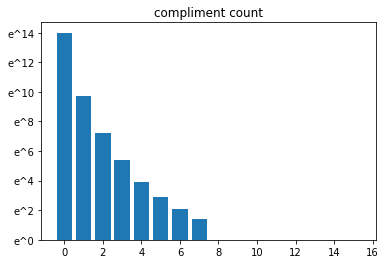

In [0]:
from matplotlib.ticker import FormatStrFormatter
df_tmp = df_tip['compliment_count']\
    .value_counts().reset_index().sort_values('index')
fig, ax = plt.subplots()
ax.bar(df_tmp['index'], np.log(df_tmp['compliment_count']))
ax.yaxis.set_major_formatter(FormatStrFormatter('e^%.0f'))
ax.set_title("compliment count");

In [0]:
print(df_tip['business_id'].value_counts())
print(123997/192609)
# there are 192,609 businesses in total
# there are 123,997 tips, covered 64% businesses

FaHADZARwnY4yvlvpnsfGA    3614
JmI9nslLD7KZqRr__Bg6NQ    2440
DkYS3arLOhA8si5uUEmHOw    1503
5LNZ67Yw9RD6nf4_UhXOjw    1487
K7lWdNUhCbcnEvI0NhGewg    1386
                          ... 
Cqc8MHqO_E3nBVb3CBE82A       1
tCBEnRW8waVRFtXUq6onFg       1
Eu4JwXc2logjyOAoaqzYAg       1
M6KM77IZG9MWxV8_036iUQ       1
wZKoVgE6PC83uCYlm0jk7g       1
Name: business_id, Length: 123997, dtype: int64
0.6437757321828159


# user.csv

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/user.csv"
df_user = pd.read_csv(path, lineterminator='\n')
print(df_user.shape)
df_user.head()
# the 'friends' column of user.csv has interesting information
# compliment sentiment columns could be helpful

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1637138, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,4.03,2,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,NaN,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,3.63,1,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,NaN,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,3.71,0,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,NaN,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,4.85,1,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,4.08,28,1,0,0,1,16,57,80,80,25,5


# review.csv

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# the size of review.csv is about 4.39 GB
# it is the largest among the text datasets
# it takes long time to load from Google Drive
path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out/review.csv"
df_review = pd.read_csv(path, lineterminator='\n')
print(df_review.shape)
df_review.head()
# there are 6,685,900 reviews
# NLP: topic, sentiment, BERT/Word2Vec embedding then feature extraction, etc.

(6685900, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [0]:
print(df_review['user_id'].value_counts())
# there are 1,637,138 users who have left reviews
# there are 1,637,138 users in total in user.csv
# Google says "142 million unique visitors per month"
# less, maybe far less, than 1% users would leave a review
# user.csv data actually comes from review.csv data
# review text will be the focus of NLP

CxDOIDnH8gp9KXzpBHJYXw    4129
bLbSNkLggFnqwNNzzq-Ijw    2354
PKEzKWv_FktMm2mGPjwd0Q    1822
ELcQDlf69kb-ihJfxZyL0A    1764
DK57YibC5ShBmqQl97CKog    1727
                          ... 
zqQX8Rwvp5WiUlST97geZA       1
O9_DfV3byybxAT3l5JDcAw       1
8W07Z4WlVhDJfOkvZYDgPw       1
XgXczqCESaSXxh8WKtSKRw       1
zaS40KWRyDlGam9Zwe5jNg       1
Name: user_id, Length: 1637138, dtype: int64


In [0]:
mean_reviews = df_review['stars'].mean()

3.7161993149762935

average stars: 3.7161993149762935


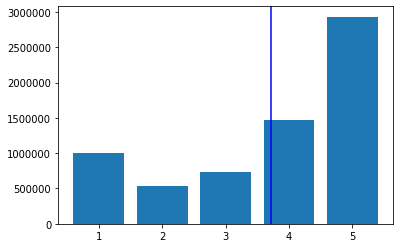

In [0]:
df_tmp = df_review['stars']\
    .value_counts().reset_index()\
    .sort_values('index')
mean_stars = df_review['stars'].mean()
print('average stars:', mean_stars)
plt.bar(df_tmp['index'], df_tmp['stars'])
plt.axvline(mean_stars, c='b');
# wild guess:
# 1 and 5 stars are more inluenced by emotions
# 2-4 stars are relatively less influenced?

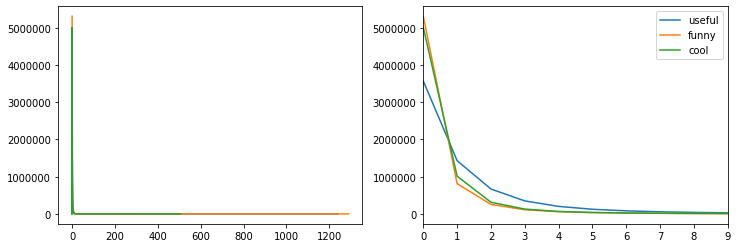

In [0]:
cols = ['useful', 'funny', 'cool']
def plot1(colname):
    df_tmp = df_review[colname]\
        .value_counts().reset_index()\
        .sort_values('index')
    plt.plot(df_tmp['index'], df_tmp[colname])    

def plot2(colname):
    df_tmp = df_review[colname]\
        .value_counts().reset_index()\
        .sort_values('index')
    df_tmp = df_tmp[df_tmp['index']<10]
    plt.plot(df_tmp['index'], df_tmp[colname])

plt.figure(figsize=(12,4))    
plt.subplot(121)
for col in cols:
    plot1(col)    
plt.subplot(122)   
plt.xlim(0,9)
for col in cols:
    plot2(col)
plt.legend(cols);  
# all 3 review feedbacks have a long tail
# "funny" and "cool" have very similar shapes

# review_datetime.csv

In [0]:
df_review['datetime'] = pd.to_datetime(df_review['date'])
df_review['datetime'].describe()
# the timespan is about 14 years

count                 6685900
unique                6552820
top       2014-07-28 05:36:33
freq                        7
first     2004-10-12 10:13:32
last      2018-11-14 18:13:26
Name: datetime, dtype: object

In [0]:
# df_review['year'] = df_review['datetime'].apply(lambda x: x.year)
# df_review['month'] = df_review['datetime'].apply(lambda x: x.month)
# df_review['day'] = df_review['datetime'].apply(lambda x: x.day)
# df_review['hour'] = df_review['datetime'].apply(lambda x: x.hour)
# df_review['weekday'] = df_review['datetime'].apply(lambda x: x.weekday())

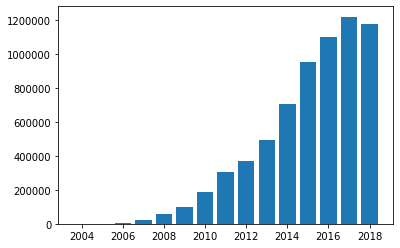

In [0]:
df_tmp = df_review['year'].value_counts().reset_index()
plt.bar(df_tmp['index'], df_tmp['year']);
# it was growing till 2017

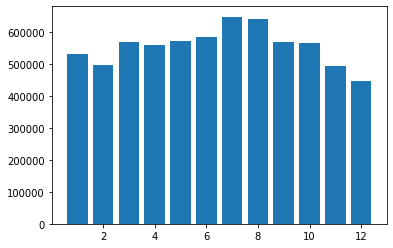

In [0]:
df_tmp = df_review['month'].value_counts().reset_index()
plt.bar(df_tmp['index'], df_tmp['month']);
# monthly number of reviews are not very different

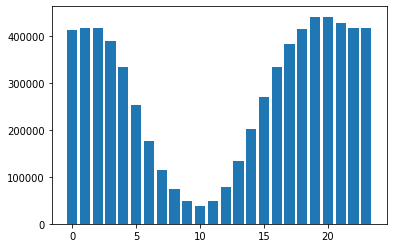

In [0]:
df_tmp = df_review['hour'].value_counts().reset_index()
plt.bar(df_tmp['index'], df_tmp['hour']);
# around 10 am users left the lest number of reviews... lol
# also from the business.csv we could see that 
# all data are about the US region

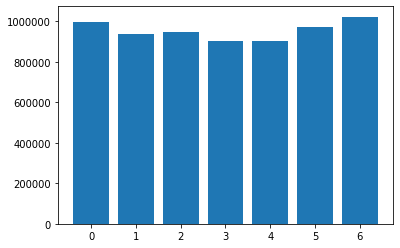

In [0]:
df_tmp = df_review['weekday'].value_counts().reset_index()
plt.bar(df_tmp['index'], df_tmp['weekday']);
# review numbers are slightly different for weekdays

In [0]:
types = df_review['text'].apply(lambda x: type(x))
types.value_counts()
# this is interesting... 
# sthere are 2 floats among all the strings.

<class 'str'>      6685898
<class 'float'>          2
Name: text, dtype: int64

In [0]:
# check those two records. they have NA in the text column.
idx = [not isinstance(e, str) for e in df_review['text']]
df_review[idx]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,datetime,year,month,day,hour,weekday
3427823,hpY467Acucmh3tCmEYGiDw,pUKAjAaSMkxiJ1WCIFSsBQ,I7XWtKL1oHohZCtCCyQIog,1.0,7,2,1,NaN,2014-11-15 21:14:34,2014-11-15 21:14:34,2014,11,15,21,5
6334066,iHdxK8lwkYn0rlNh-REuGQ,v3DIq18Z30KNwyUvBXtXEA,oXoVJ0xKv82cBo9U6oEjlQ,3.0,0,0,0,NaN,2014-12-26 08:32:06,2014-12-26 08:32:06,2014,12,26,8,4


### text length

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out"
df_review = pd.read_csv(path+"/review_datetime.csv")

# df_review['text_length'] = df_review['text'].fillna('').apply(lambda x: len(x))
df_review['text_length'].describe()

count    6.685902e+06
mean     6.027973e+02
std      5.688755e+02
min      0.000000e+00
25%      2.370000e+02
50%      4.250000e+02
75%      7.660000e+02
max      5.000000e+03
Name: text_length, dtype: float64

In [0]:
# # save as CSV file
# path = "/content/drive/My Drive/data/2019-12-06 yelp/yelp_dataset/csv_out"
# df_review.to_csv(path+"/review_datetime.csv", index=False)

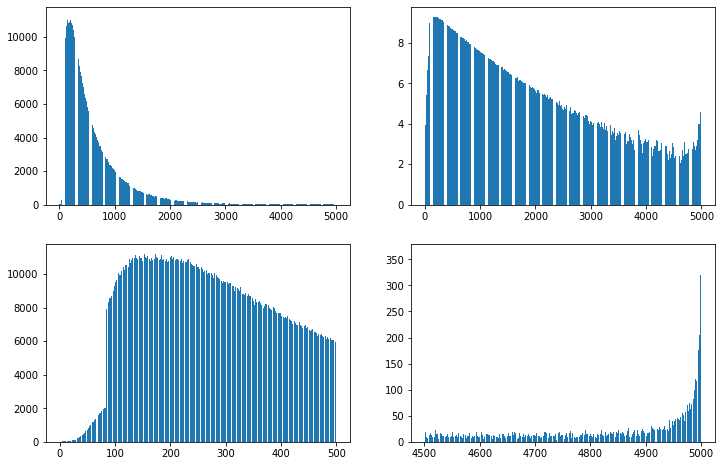

In [0]:
df_tmp = df_review['text_length'].value_counts().reset_index()
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.bar(df_tmp['index'], df_tmp['text_length'])
plt.subplot(222)
plt.bar(df_tmp['index'], np.log(df_tmp['text_length']))
plt.subplot(223)
df_tmp1 = df_tmp[df_tmp['index']<500]
plt.bar(df_tmp1['index'], df_tmp1['text_length'])
plt.subplot(224)
df_tmp = df_tmp[df_tmp['index']>4500]
plt.bar(df_tmp['index'], df_tmp['text_length']);
# this is a very interesting distribution
# there is a discontinuity around 80(?) characters.
# it might be caused by the old limit of review length
# we could exam the text length time series.

### monthly maximum text length

In [0]:
from datetime import datetime

# 4 records have NA value in the 'date' column
years = df_review['year'].dropna().unique().astype(int)
months = np.arange(1, 13, 1)
lengths = []
for year in years:
    for month in months:
        condition = ((df_review['year']==year) &
            (df_review['month']==month))
        length = df_review[condition]['text_length'].max()
        lengths.append([year, month, length])
lengths = pd.DataFrame(lengths, columns=['year', 'month', 'maximum'])
lengths = lengths.dropna().sort_values(['year', 'month'])
lengths['date'] = lengths.apply(lambda x: 
    datetime.strptime(
        str(int(x['year']))+str(int(x['month'])).zfill(2)+'01', 
        '%Y%m%d'),
    axis=1)
lengths

,year,month,maximum,date
129,2004,10,140.0,2004-10-01
131,2004,12,826.0,2004-12-01
168,2005,1,188.0,2005-01-01
169,2005,2,73.0,2005-02-01
170,2005,3,819.0,2005-03-01
...,...,...,...,...
42,2018,7,5000.0,2018-07-01
43,2018,8,5000.0,2018-08-01
44,2018,9,5000.0,2018-09-01
45,2018,10,5000.0,2018-10-01


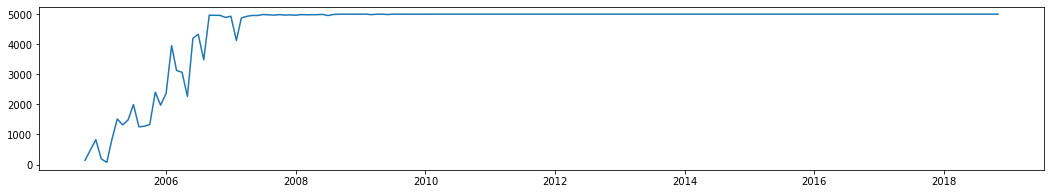

In [0]:
# monthly maximum length of reviews
plt.figure(figsize=(18, 3))
plt.plot(lengths['date'], lengths['maximum']);

### a sample of review longer than 4000

In [0]:
# sample a review longer than 4,000 characters
print(df_review[df_review['text_length']>4000]['text'].sample().values[0])

I am writing this review in an endeavor to help those who are looking for high-end, luxury accommodations in Charlotte.  We moved from LA and OC, where most recently, we were living in the penthouse of a high-rise, luxury building in OC.

Having lived in Charlotte at the VUE for about 3.5 months, I can definitely say that if you are looking for posh, secure, pet-friendly, prime Uptown location living accomodations, the VUE is, far and above, your best option when it comes to rentals.  

We made two different trips to Charlotte and literally visited nearly every new building in Charlotte, along with any condos or homes for rent in the $4000/month+ range before selecting the VUE.  We looked at the penthouse at the VUE and although there is about 3600 square feet, it was too large for us (two professionals with no children), the floorplan wasn't very open (from the kitchen, you have an obstructed city view), and the available finishes were too traditional for our taste.  We decided to go 